In [1]:
import pandas as pd
import ujson
import json
import constants

json_surah_words = '../output-data/json-surah-words/'
ayah_roots = '../output-data/ayahRoots/'
# ayah_root =  pd.read_json(ayah_roots + str(i) + '.json') # hisham stuff

surah_df = pd.read_json(json_surah_words + '1.json')
for i in range(2, 115):
    cur_df = pd.read_json(json_surah_words + str(i) + '.json')
    surah_df = pd.concat([surah_df, cur_df], ignore_index=True)
    print(len(surah_df))

4224
6673
9318
11255
13367
15676
16550
18315
19545
20805
22002
22614
23211
23651
24925
26063
27189
27892
28780
29562
30442
31137
32056
32725
33605
34397
35341
36023
36594
36965
37221
38163
38763
39310
39793
40381
40890
41723
42583
43129
43697
44257
44490
44835
45281
45673
46095
46343
46596
46845
47070
47308
47567
47828
48101
48514
48841
49147
49387
49546
49675
49801
49981
50193
50376
50609
50814
50989
51149
51310
51496
51645
51823
51936
52119
52242
52378
52512
52605
52687
52742
52857
52937
53009
53050
53105
53172
53275
53329
53372
53429
53461
53480
53507
53561
53582
53648
53676
53701
53727
53743
53755
53778
53796
53809
53827
53834
53846
53863
53880
53890
53907
53924


In [2]:
surah_df

,answer,arabicAyah,ayahnum,frequency,pcklId,question,rootWord,rootWordId,rootWordType,surahnum,tlit,wazn,waznEnglish,waznTlit,waznType,wordnum
0,(of) those,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْر...,7,1464,0,الَّذِينَ,ٱلَّذِى,59,nominal,1,alladhīna,ٱلَّذِى,"who, which, that",alladhī,Nominal (Relative pronoun),2
1,(of) Allah,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,2851,147,اللَّهِ,أ ل ه,61,triliteral root,1,l-lahi,ٱللَّه,Allah,allah,Proper noun,2
2,(be) to Allah,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,2851,148,لِلَّهِ,أ ل ه,61,triliteral root,1,lillahi,ٱللَّه,Allah,allah,Proper noun,2
3,All praises and thanks,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,63,1,الْحَمْدُ,ح م د,352,triliteral root,1,al-ḥamdu,حَمْد,they be praised,ḥamd,Noun,1
4,(of the) Judgment,مَالِكِ يَوْمِ الدِّينِ,4,101,2,الدِّينِ,د ي ن,498,triliteral root,1,l-dīni,دِين,they acknowledge,dīn,Noun,3
5,the Lord,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,2,980,0,رَبِّ,ر ب ب,524,triliteral root,1,rabbi,رَبّ,the Lord,rabb,Noun,3
6,the Most Gracious,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,339,90,الرَّحْمَٰنِ,ر ح م,544,triliteral root,1,l-raḥmāni,رَّحْمَٰن,and have mercy on us,raḥmān,Nominal (Adjective),3
7,The Most Gracious,الرَّحْمَٰنِ الرَّحِيمِ,3,339,91,الرَّحْمَٰنِ,ر ح م,544,triliteral root,1,al-raḥmāni,رَّحْمَٰن,and have mercy on us,raḥmān,Nominal (Adjective),1
8,the Most Merciful,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,1,339,216,الرَّحِيمِ,ر ح م,544,triliteral root,1,l-raḥīmi,رَّحِيم,and have mercy on us,raḥīm,Nominal (Adjective),4
9,the Most Merciful,الرَّحْمَٰنِ الرَّحِيمِ,3,339,217,الرَّحِيمِ,ر ح م,544,triliteral root,1,l-raḥīmi,رَّحِيم,and have mercy on us,raḥīm,Nominal (Adjective),2


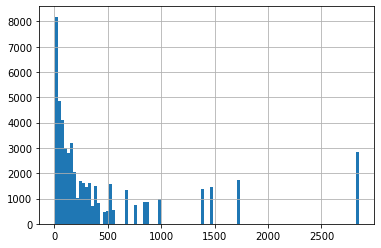

In [64]:
# surah_df[['ayahnum', 'frequency', 'rootWordId', 'tlit', 'waznType']]
df = surah_df[['surahnum', 'ayahnum', 'frequency', 'rootWordId']].copy(deep=True)

df['ayahnum'] = df['surahnum'].astype(str) + '/' + df['ayahnum'].astype(str)
df=df.drop(['surahnum'], axis=1)


df['frequency'].hist(bins=100)

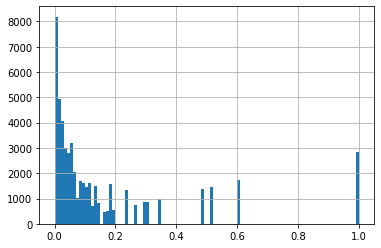

In [65]:
# standarize frequency
moct = df['frequency'].describe()

std_multiplier_constant = 10
df['freq_stdized'] = (df['frequency'] - moct['mean']) / moct['std']
df['freq_stdized'] = df['freq_stdized'] + abs(min(df['freq_stdized']))
df['freq_stdized'] = df['freq_stdized'] / max(df['freq_stdized'])
df['freq_stdized'].hist(bins=100)

In [66]:
# build freq_stdized list
df2 = df.groupby('ayahnum').frequency.apply(lambda x: ','.join(map(str, x))).reset_index()
df2.loc[:,'frequency'] = df2.loc[:, 'frequency'].apply(lambda x: [float(y) for y in x.split(",")])
df2.head()

,ayahnum,frequency
0,1/1,"[2851.0, 339.0, 339.0, 381.0]"
1,1/2,"[2851.0, 63.0, 980.0, 854.0]"
2,1/3,"[339.0, 339.0]"
3,1/4,"[101.0, 206.0, 405.0]"
4,1/5,"[275.0, 11.0]"


In [67]:
import numpy as np
# df2['freq_score'] = df2.loc[:, 'frequency'].apply(lambda x: [i**1.3 for i in x])
df2['freq_score'] = df2.loc[:, 'frequency'].apply(lambda x: [i for i in x])

In [63]:
# different freq_score calculations
df3 = df2.copy(deep=True)
df3.head()
# df3['freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x))
df3['mean_freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x))
df3['min_freq'] = df3.loc[:, 'freq_score'].apply(lambda x: np.min(x))
df3['min_freq'] = df3.loc[:, 'freq_score'].apply(lambda x: np.min(x))
df3['freq_score'] = df3['mean_freq_score']
# df3['freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x) + np.min(x) ** 1.5)
# df3['freq_score'] = df3.loc[:, 'freq_score'].apply(lambda x: np.mean(x) * np.min(x) ** 1.5 * (1 / len(x))
df3.head(10)
# df3['freq_score'].hist(bins=10)

,ayahnum,frequency,freq_score,mean_freq_score,min_freq
0,"1,1","[2851.0, 339.0, 339.0, 381.0]",977.500000,977.500000,339.0
1,"1,2","[2851.0, 63.0, 980.0, 854.0]",1187.000000,1187.000000,63.0
2,"1,3","[339.0, 339.0]",339.000000,339.000000,339.0
3,"1,4","[101.0, 206.0, 405.0]",237.333333,237.333333,101.0
4,"1,5","[275.0, 11.0]",143.000000,143.000000,11.0
5,"1,6","[45.0, 660.0, 316.0]",340.333333,340.333333,45.0
6,"1,7","[1464.0, 45.0, 191.0, 24.0, 154.0, 140.0]",336.333333,336.333333,24.0
7,"10,1","[382.0, 210.0, 319.0]",303.666667,303.666667,210.0
8,"10,10","[250.0, 2851.0, 2851.0, 63.0, 184.0, 212.0, 21...",789.909091,789.909091,63.0
9,"10,100","[102.0, 663.0, 1464.0, 2851.0, 879.0, 346.0, 1...",805.200000,805.200000,10.0


In [68]:
df2=df2.drop(['freq_stdized'], axis=1)
df2

KeyError: "['freq_stdized'] not found in axis"

In [70]:
# normalize between 0-1000
a, b = 0, 1000
x, y = df3.freq_score.min(), df3.freq_score.max()
df3['level'] = b - (df3.freq_score - x) / (y - x) * (b - a) + a
df3.level = df3.level.round()
df3 = df3.sort_values(by='freq_score', ascending=False)
df3

,ayahnum,frequency,freq_score,mean_freq_score,min_freq,level
3819,"44,34",[1722.0],1722.000000,1722.000000,1722.0,0.0
4864,"64,13","[663.0, 2851.0, 2851.0, 2851.0, 879.0, 70.0]",1694.166667,1694.166667,70.0,16.0
1791,"23,85","[2851.0, 292.0, 1722.0, 1722.0]",1646.750000,1646.750000,292.0,44.0
1793,"23,87","[2851.0, 1722.0, 1722.0, 258.0]",1638.250000,1638.250000,258.0,49.0
3071,"37,167","[1722.0, 1390.0]",1556.000000,1556.000000,1390.0,96.0
314,"112,1","[85.0, 2851.0, 1722.0]",1552.666667,1552.666667,85.0,98.0
325,"114,3","[2851.0, 241.0]",1546.000000,1546.000000,241.0,102.0
495,"14,20","[2851.0, 119.0]",1485.000000,1485.000000,119.0,138.0
2877,"35,17","[2851.0, 119.0]",1485.000000,1485.000000,119.0,138.0
431,"12,91","[21.0, 2851.0, 2851.0, 22.0, 1722.0, 1390.0]",1476.166667,1476.166667,21.0,143.0
